In [5]:
import sys
import os

app_base_dir = '/home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import re
# import collections
import numpy as np
import psycopg2 as pg
import scipy.ndimage.filters
# import pandas as pd
# import pandas.io.sql as psql
# import matplotlib as mpl
import matplotlib as mpl
import matplotlib.pyplot as plt
# from tqdm import tqdm
# import glob
#import ROOT
import skimage
import skimage.filters
import glob

import tool.acqconv

In [12]:
def find_files(files_dirs, recursive, filter_func):
    if not isinstance(files_dirs, (list, tuple)):
        files_dirs = [files_dirs]
    processed_files = []
    
    for files_dir in files_dirs:
        if recursive:
            processed_files += [os.path.join(dp, f) for dp, dn, fn in os.walk(files_dir) for f in fn if filter_func(f)]
        else:
            processed_files += [os.path.join(files_dir,f) for f in os.listdir(files_dir) if filter_func(f)]

    return sorted(set(processed_files))

def find_acquisition_files(files_dirs, recursive=True):
    return find_files(files_dirs, recursive, lambda f: os.path.splitext(f)[1] == ".root" and "ACQUISITION" in os.path.basename(f))    

In [13]:
acquisition_files = find_acquisition_files(glob.glob('/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170???'))

In [27]:
len(acquisition_files)

1009

In [31]:
num_packets_at_once = 10
packet_size = 128
avg_frames = None
for af_i,acquisition_file in enumerate(acquisition_files):
    i=0
    while i < 100000000:
        frames = tool.acqconv.get_frames(acquisition_file, num_packets_at_once*packet_size*i, last_gtu = num_packets_at_once*packet_size*(i+1), loopover=False, mcid=0, ccbid=0, entry_is_gtu_optimization=True)
        if len(frames) == 0:
            break
        block_avg_frames = None
        for j,frame in enumerate(frames):
            if np.count_nonzero(frame) > 256*9 - 64:
                block_avg_frames = np.array(frame, dtype=np.float32)
                break
        if j+1 < len(frames):
            for frame in frames[j+1:]:
                if np.count_nonzero(frame) > 256*9 - 64:
                    block_avg_frames += frame
                    block_avg_frames /= 2
            if block_avg_frames is not None:
                if avg_frames is None:
                    avg_frames = block_avg_frames
                else:
                    avg_frames += block_avg_frames
                    avg_frames /= 2
        i += 1
    print(af_i, acquisition_file, i)

0 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-110510-001.001--CHECK.root 1
1 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-125845-001.001--CHECK.root 2
2 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-125930-001.001--LONG.root 4
3 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-125930-002.001--LONG.root 5
4 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-125930-003.001--LONG.root 6
5 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-125930-004.001--LONG.root 4
6 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170426/allpackets-SPBEUSO-ACQUISITION-20170426-125930-005.001--LONG.root 32
7 /media/node15_data2/SPBDATA/a

59 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-004.001--LONG-sqz.root 105
60 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-005.001--LONG-sqz.root 114
61 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-006.001--LONG-sqz.root 103
62 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-007.001--LONG-sqz.root 99
63 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG-sqz.root 101
64 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root 101
65 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG-sqz

116 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-019.001--LONG-sqz-dis.root 34
117 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-019.001--LONG-sqz.root 4
118 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-020.001--LONG-sqz-dis.root 32
119 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-020.001--LONG-sqz.root 7
120 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-021.001--LONG-sqz-dis.root 36
121 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-021.001--LONG-sqz.root 9
122 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115303-02

172 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-016.001--LONG-sqz.root 4
173 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-017.001--LONG-sqz-dis.root 30
174 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-017.001--LONG-sqz.root 2
175 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-018.001--LONG-sqz-dis.root 34
176 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-018.001--LONG-sqz.root 9
177 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-019.001--LONG-sqz-dis.root 34
178 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125407-01

230 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-020.001--LONG.root 6
231 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-021.001--LONG.root 6
232 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-022.001--LONG.root 6
233 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-023.001--LONG.root 7
234 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-024.001--LONG.root 7
235 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-025.001--LONG.root 7
236 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-063224-026.001--LONG.root 5
237 /media/node15_da

346 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-009.001--LONG.root 18
347 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-010.001--LONG.root 23
348 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-011.001--LONG.root 18
349 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-012.001--LONG.root 18
350 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-013.001--LONG.root 18
351 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-014.001--LONG.root 20
352 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-140915-015.001--LONG.root 19
353 /media/no

405 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-161317-020.001--LONG.root 7
406 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-161317-021.001--LONG.root 3
407 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-161317-022.001--LONG.root 2
408 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-055842-001.001--CHECK.root 5
409 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-055927-001.001--LONG.root 17
410 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-055927-007.001--LONG.root 16
411 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-055927-010.001--LONG.root 15
412 /media/node1

521 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-016.001--LONG-sqz.root 15
522 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-017.001--LONG-sqz.root 15
523 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-018.001--LONG-sqz.root 13
524 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-019.001--LONG-sqz.root 12
525 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-020.001--LONG-sqz.root 11
526 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-020.001--LONG.root 11
527 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-110448-021.001--LONG-s

578 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-014.001--LONG-sqz.root 18
579 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-015.001--LONG-sqz.root 17
580 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-016.001--LONG-sqz.root 14
581 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-017.001--LONG-sqz.root 16
582 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-018.001--LONG-sqz.root 13
583 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-019.001--LONG-sqz.root 13
584 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-130657-020.001--LO

635 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-021.001--LONG-sqz.root 9
636 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-022.001--LONG-sqz.root 5
637 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-023.001--LONG-sqz.root 8
638 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-024.001--LONG-sqz.root 7
639 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-025.001--LONG-sqz.root 8
640 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-026.001--LONG-sqz.root 6
641 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-095101-027.001--LONG-sqz

692 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-125414-016.001--LONG-sqz.root 10
693 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-125414-017.001--LONG-sqz.root 10
694 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-125414-018.001--LONG-sqz.root 10
695 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-125414-019.001--LONG-sqz.root 8
696 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-125414-020.001--LONG-sqz.root 4
697 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-133518-001.001--CHECK.root 2
698 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-133603-001.001--LONG-sqz

749 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-022.001--LONG-sqz.root 8
750 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-023.001--LONG-sqz.root 8
751 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-024.001--LONG-sqz.root 8
752 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-025.001--LONG-sqz.root 8
753 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-026.001--LONG-sqz.root 8
754 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-027.001--LONG-sqz.root 8
755 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170430/allpackets-SPBEUSO-ACQUISITION-20170430-143708-028.001--LONG-sqz

807 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-004.001--LONG-sqz.root 2
808 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-005.001--LONG-sqz.root 2
809 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-006.001--LONG-sqz.root 2
810 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-007.001--LONG-sqz.root 1
811 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-008.001--LONG-sqz.root 2
812 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-009.001--LONG-sqz.root 2
813 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170501/allpackets-SPBEUSO-ACQUISITION-20170501-063222-010.001--LONG-sqz

865 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-012.001--LONG-sqz.root 15
866 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-013.001--LONG-sqz.root 14
867 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-014.001--LONG-sqz.root 13
868 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-015.001--LONG-sqz.root 15
869 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-016.001--LONG-sqz.root 13
870 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-017.001--LONG-sqz.root 12
871 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-094518-018.001--LO

922 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-008.001--LONG-sqz.root 4
923 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-009.001--LONG-sqz.root 3
924 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-010.001--LONG-sqz.root 5
925 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-011.001--LONG-sqz.root 6
926 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-012.001--LONG-sqz.root 5
927 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-013.001--LONG-sqz.root 6
928 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-114710-014.001--LONG-sqz

979 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-003.001--LONG-sqz.root 2
980 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-004.001--LONG-sqz.root 2
981 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-005.001--LONG-sqz.root 3
982 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-006.001--LONG-sqz.root 3
983 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-007.001--LONG-sqz.root 4
984 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-008.001--LONG-sqz.root 4
985 /media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170502/allpackets-SPBEUSO-ACQUISITION-20170502-134901-009.001--LONG-sqz

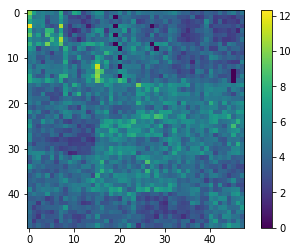

In [32]:
cax = plt.imshow(avg_frames)
plt.colorbar(cax)
plt.show()